In [6]:
##IMPORT
#import the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import itertools
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
ols = linear_model.LinearRegression()

#import the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
cleanedtrain = pd.read_csv('cleanedtrain.csv')
cleanedtest = pd.read_csv('cleanedtest.csv')
cleanedtrainylog = pd.read_csv('cleanedtrainwithYlog.csv')
try3 = pd.read_csv('try3.csv')
te3 = pd.read_csv('te3.csv')

liso = ['YearBuilt',
'YearRemodAdd',
'Street_Pave',
'OverallCond',
'OverallQual',
'Condition2_PosA',
'Neighborhood_StoneBr',
'RoofMatl_WdShngl',
'Neighborhood_NridgHt',
'GarageCars',
'GrLivArea',
'Neighborhood_Crawfor',
'Functional_Typ',
'SaleType_New',
'Neighborhood_NoRidge',
'BsmtQual_No',
# '1stFlrSF',
'BsmtExposure_Gd',
'MSZoning_FV',
'Exterior1st_BrkFace',
'Heating_GasW',
# 'BsmtFullBath',
'Condition1_Norm',
'Fireplaces',
'Exterior2nd_ImStucc',
# 'FullBath',
'SaleCondition_Normal',
'Neighborhood_Somerst',
# 'HalfBath',
'CentralAir_Y',
'RoofMatl_Membran',
'MasVnrType_Stone',
'MSZoning_RL',
'Heating_Wall',
'Exterior1st_VinylSd',
# 'TotalBsmtSF',
'LotArea',
'LotShape_IR2',
'Exterior2nd_Stucco',
'Neighborhood_ClearCr',
'Foundation_PConc',
'TotalSF',
'HouseStyle_SFoyer',
'PavedDrive_Y',
'PoolArea',
'BsmtCond_Po',
'BsmtFinType1_No',
'Electrical_FuseF',
'GarageType_BuiltIn',
'BsmtFinSF1',
'TotalBath',
# '2ndFlrSF',
# 'ScreenPorch',
'Exterior2nd_VinylSd',
'ExterCond_TA',
'HouseStyle_2Story',
'GarageType_Detchd',
'BsmtFinType1_GLQ',
# 'OpenPorchSF',
'BsmtFinType2_No',
'TotalPorchSF',
# 'WoodDeckSF',
'Foundation_Stone',
'Exterior1st_Stucco',
'HouseStyle_1.5Unf',
'Exterior2nd_CmentBd']

In [8]:
#Create DataFrame with all the independant variables and betas
temp_df = try3.drop(['ylogSalePrice'], axis=1)
# temp_df = temp_df.astype(int)
#appending to an empty list, creating into an array then transposing
# ll = []
# for column in temp_df:
#     ll.append(list(temp_df[column]))
# lla = np.array(ll[1:])
# x_m = lla.T
# y_m = list(cleanedtrainylog['ylogSalePrice'])

(array([  3.,   3.,   4.,  24., 109., 606., 607.,  87.,  12.,   1.]),
 array([-0.74658577, -0.62067708, -0.4947684 , -0.36885971, -0.24295103,
        -0.11704234,  0.00886635,  0.13477503,  0.26068372,  0.3865924 ,
         0.51250109]),
 <a list of 10 Patch objects>)

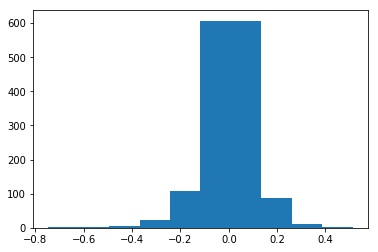

In [10]:
#Creating variables for the model.
tempfull = temp_df.iloc[:,1:]
temp = temp_df.loc[:,liso]
featuresfull = tempfull.copy()
features = temp.copy()
price   = try3['ylogSalePrice']

#LM and basic histogram to check normality and distribution
lm = LinearRegression()
lm.fit(features, price)
residuals = price - lm.predict(features)
plt.hist(residuals)
# temp.describe()

In [11]:
#Testing and creating csv for Kaggle
cleanedtestx = te3.loc[:,liso]
testresults = lm.predict(cleanedtestx)
testresults = pd.DataFrame({'Id' : test['Id'], 'SalePrice' : testresults})
testresults['SalePrice'] = np.exp(testresults['SalePrice'])
# testresults
testresults.to_csv('MLRPredictions3.csv',index = False)

In [21]:
# #Checking scores and betas
# print('R^2 is equal to %.3f' %(lm.score(features, price)))
# print('RSS is equal to %.3f' %(np.sum((price-lm.predict(features))**2)))
# print('The intercept is %.3f' %(lm.intercept_))
# print('The slopes are %s' %(lm.coef_))

In [20]:
# #positive and negative slopes if ever
# print('negative slope column names %s' %(features.columns[lm.coef_<0]))
# print('positive slope column names %s' %(features.columns[lm.coef_>0]))

In [19]:
# #initialize a dictionary for Brute Force feature selection, Thanks mikolaj!
# scores = {}
# #loop through each 3 column combination of the dataframe and fit a linear model with each combo
# #add the R^2 to dictionary as a key and the combo as the value for each 3 combo
# for i in range(0,2000):
#     combo = list(itertools.combinations(featuresfull.columns,3))[i]
# #     combo = list(randomcombination(featuresfull.columns,3))[i]
#     combo_list = list(combo)
#     lm.fit(featuresfull[combo_list],price)
#     scores[lm.score(featuresfull[combo_list],price)] = combo_list
#     print ('Working...{}.'.format(i))

In [18]:
# # sorted(scores.items(), key=lambda t:t[1], reverse=True)[:10]
# for key in sorted(scores):
#    print(key, scores[key])

In [5]:
# #Statsmodel package from the HW
# import statsmodels.api as sm
# x = sm.add_constant(features)
# model = sm.OLS(price, x)
# results = model.fit()
# print(results.summary())

In [8]:
# pValues = results.pvalues
# print('The significant coefficients')
# pValues[pValues<0.05]

In [9]:
# print('The insignificant coefficients')
# pValues[pValues>=0.05]

In [4]:
# #Scaling data for cross validation
# scaler = MinMaxScaler(feature_range=(0, 1))
# tempx = scaler.fit_transform(temp)

In [3]:
# #Cross Validation with printed indices
# scores = []
# best_svr = SVR(kernel='rbf')
# cv = KFold(n_splits=10, random_state=42, shuffle=False)
# for train_index, test_index in cv.split(tempx):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

#     X_train, X_test, y_train, y_test = tempx[train_index], tempx[test_index], price[train_index], price[test_index]
#     best_svr.fit(X_train, y_train)
#     scores.append(best_svr.score(X_test, y_test))

In [2]:
# #fit and append for scores list.
# best_svr.fit(X_train, y_train)
# scores.append(best_svr.score(X_test, y_test))

In [1]:
#score is still upper 70s/80
# print(np.mean(scores))

In [42]:
# cross_val_score(best_svr, tempx, price, cv=10)

In [14]:
# cross_val_predict(best_svr, tempx, price, cv=10)